# Midterm Part II

In this midterm, we will compare optimization algorithms for linear regression.
- linear regression X (analytic solution, gradient descent, adam)
without using torch.nn / torch.optim packages.

For this exam, you need to 
1. fill out ``midterm.py``
2. run the current jupyter notebook
3. explain the two algorithms GD & ADAM by comparing your results (answer at the end of this notebook)


## Google Colab Setup
Setup the work environment following Homework 1 (mount google drive, set the path)

## Setup Code
Before getting started, we need to run some boilerplate code to set up our environment, same as Assignment 1. You'll need to rerun this setup code each time you start the notebook.

First, run this cell load the autoreload extension. This allows us to edit .py source files, and re-import them into the notebook for a seamless editing and debugging experience.

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Using Google Colab
from google.colab import drive
drive.mount('/content/drive')
import os

Mounted at /content/drive


In [ ]:
# /content/drive/MyDrive/2022-1/deep_learning_lecture/midterm/midterm.py

%cd /content/drive/MyDrive/2022-1/deep_learning_lecture/midterm

/content/drive/MyDrive/2022-1/deep_learning_lecture/midterm


## Generate a simulation model

In [ ]:
import torch
import midterm

import math
import matplotlib.pyplot as plt

midterm.reset_seed(1)
trainX, trainy, true_beta = midterm.gen_linear(N=500,D=10)
testX, testy, beta2 = midterm.gen_linear(N=500,D=10, beta=torch.squeeze(true_beta))
print(true_beta-beta2)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])


## Fit linear regression with analytic solution
Here, you need to fill out ``midterm.py`` file (``train_analytic``, ``predict`` functions).

In [ ]:
model_a = midterm.LinearRegress(trainX,trainy)
model_a.train_analytic()
print('Training Mean squared error (MSE):', (model_a.beta-true_beta).square().mean())
print('Training Mean squared prediction error (MSPE):', (model_a.yhat_train-trainy).square().mean())
testy_hat = model_a.predict(testX)
print('Test Mean squared prediction error (MSPE):', (testy_hat-testy).square().mean())


Training Mean squared error (MSE): tensor(0.0063)
Training Mean squared prediction error (MSPE): tensor(1.0963)
Test Mean squared prediction error (MSPE): tensor(0.9470)


## Ridge with analytic solution
There is no additional codding required. We can just modify $\lambda$.

In [ ]:
model_a.train_analytic(lam=.5)
print('Training Mean squared error (MSE):', (model_a.beta-true_beta).square().mean())
print('Training Mean squared prediction error (MSPE):', (model_a.yhat_train-trainy).square().mean())
testy_hat = model_a.predict(testX)
print('Test Mean squared prediction error (MSPE):', (testy_hat-testy).square().mean())


Training Mean squared error (MSE): tensor(0.0063)
Training Mean squared prediction error (MSPE): tensor(1.0966)
Test Mean squared prediction error (MSPE): tensor(0.9486)


## Using gradient descent
Let's use the MSPE as our loss function,
$$ L(y,beta) =\frac{1}{N} \sum (y_i-({\beta}_0 + {\beta}_1 x_{i1}+ \ldots + {\beta}_D x_{iD})^2, $$
because we do not know the true ``beta`` in a real case.

With a matrix form (and a proper modification), 
$$ L(y,beta) = \frac{1}{N}\|y-X\beta\|^2 $$
Write down your gradient descent method code in ``train_gd``. Don't forget to consider $\frac{1}{n}$. Without it, your gradient might be too large (change the learning rate). 

In the code below, you can modify ``lr`` and ``niter`` as you want. 

Training Mean squared error (MSE): tensor(4.4635)
Training Mean squared prediction error (MSPE): tensor(18.0493)
Test Mean squared prediction error (MSPE): tensor(17.5385)


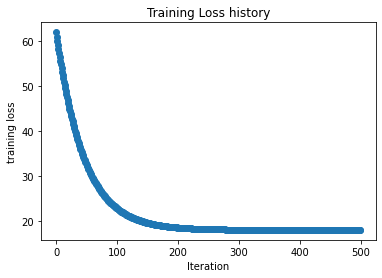

In [ ]:
model_gd = midterm.LinearRegress(trainX,trainy)

lr = 1e-3
niter = 500
model_gd.train_gd(niter = niter, lr=lr)

print('Training Mean squared error (MSE):', (model_gd.beta-true_beta).square().mean())
print('Training Mean squared prediction error (MSPE):', (model_gd.yhat_train-trainy).square().mean())
testy_hat = model_gd.predict(testX)
print('Test Mean squared prediction error (MSPE):', (testy_hat-testy).square().mean())

# plot the loss history
plt.plot(model_gd.loss_history, 'o')
plt.xlabel('Iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()


## Adam
Let's use adam as your optimizer. Fill out the ``train_adam``. In your code, you can add ``t=t+1`` at the beginning to make the iteration number start from 1 instead of 0. 
- Try to modify your ``lr`` to see how sensitive it is. 
- Try to modify ``niter`` to see how fast it is.

Training Mean squared error (MSE): tensor(4.7960)
Training Mean squared prediction error (MSPE): tensor(61.9297)
Test Mean squared prediction error (MSPE): tensor(56.7247)


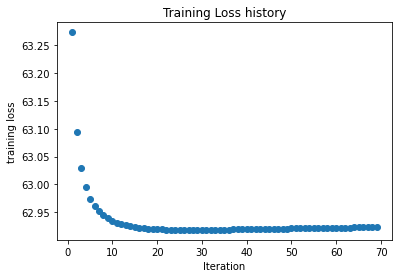

In [ ]:
model_adam = midterm.LinearRegress(trainX,trainy)

lr = 1
niter = 70
model_adam.train_adam(niter = niter, lr=lr, beta1=0.9, beta2=0.999)

print('Training Mean squared error (MSE):', (model_adam.beta-true_beta).square().mean())
print('Training Mean squared prediction error (MSPE):', (model_adam.yhat_train-trainy).square().mean())
testy_hat = model_adam.predict(testX)
print('Test Mean squared prediction error (MSPE):', (testy_hat-testy).square().mean())

# plot the loss history
plt.plot(model_adam.loss_history, 'o')
plt.xlabel('Iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()


### Compare test MSPE 

In [ ]:
testy_hat = model_a.predict(testX)
print('Analytic-Test Mean squared prediction error (MSPE):', (testy_hat-testy).square().mean())

testy_hat = model_gd.predict(testX)
print('GD-Test Mean squared prediction error (MSPE):', (testy_hat-testy).square().mean())

testy_hat = model_adam.predict(testX)
print('adam-Test Mean squared prediction error (MSPE):', (testy_hat-testy).square().mean())

Analytic-Test Mean squared prediction error (MSPE): tensor(0.9486)
GD-Test Mean squared prediction error (MSPE): tensor(17.5385)
adam-Test Mean squared prediction error (MSPE): tensor(56.7247)


# Explain the two optimization algorithms with comparison

## Fill out your answer below. A paragraph would be fine!
answer: 

◎ Gradient Descent  
  - 머신러닝의 학습은 Loss Function을 최소화하는 모수 w를 찾는 것을 말하며 이를 Optimization(최적화) 과정이라고 한다. Gradient Descent Alogrithm은 Loss Function을 최소화하는 Optimization 과정에서 활용하는 방법이다.
  - Gradient Descent는 모든 자료로부터 산출된 Loss Function을 이용한 Optimization 방법론이다. 즉, ‘모든 자료를 다 검토해서 내 위치의 산기울기를 계산해서 갈 방향을 찾겠다’고 말할 수 있겠다. n개의 자료가 있을 때 n개의 자료를 모두 이용하므로 1번의 최신화가 일어나게 되며 이를 1 epoch라고 한다.
  - 수식으로는 $$x_{i+1} = x_{i} - \alpha\triangledown f(x_{i})$$로 표현한다.  
즉, $x_{i+1} = x_{i} -$(이동거리) * (기울기의 부호)이다. $\alpha$는 Learning Rate라고 말하며 적절한 Learning Rate를 설정하는 것 역시 중요하겠다.  



◎ Adam  
- Adam은 Adaptive와 Momentum을 합친 것이다. Momentum은 새로운 계수로 v를, AdaGrad는 h를 추가하여 최적화를 진행하였는데 Adam은 두 기법에서 h, v가 각각 최초 0으로 설정되어 학습 초반에 0으로 biased되는 문제를 해결하기 위해 고안된 방법이다. Momentum과 AdaGrad 및 RMSProp를 합친 것으로, Step 방향도, Step Size도 적절하게 하자는 입장을 취하고 있다.
- Adam은 Tracks first moments(Momentum)과 Tracks second moments(Adaptive learning rates)와 Leaky second moments와 Bias correction for moment estimates 모두를 채택한 것이다.
- 수식으로는 $$m_{t} = \beta_{1}m_{t-1}+(1-\beta_{1})g_{t}$$
$$v_{t} = \beta_{2}v_{t-1}+(1-\beta_{2})g_{t}^2$$
$$\hat{m_{t}} = \cfrac{m_t}{1-\beta_{1}^t} \theta_{t+1} = \theta_{t} - \cfrac{\eta}{\sqrt{\hat{v_{t}} + \epsilon}}\hat{m_{t}}$$
$$\hat{v_{t}} = \cfrac{v_t}{1-\beta_{2}^t}$$
로 표현한다.   
$g_{t}$는 Gradient를 의미하며, $m_{t}$는 Momentum, $v_{t}$는 adaptive learning rate를 위한 Term을 의미한다. 일반적으로 $\beta_{1}$=0.9, $\beta_{2}$=0.999로 초기화된다. $\hat{m_{t}}$와 $\hat{v_{t}}$는 학습 초반에 이전 누적값이 0이 되면서 $m_{t}$는 매우 크고 $v_{t}$는 매우 작은 현상을 보정하는 작업을 하게 된다. 이를 통해 Momentum과 RMSProp의 장점을 취합해놓았다.